In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seawater as csr
from matplotlib import cm

###### use basemap

In [2]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

###### read ARGO files in

In [3]:
# read multiple files
import os
# path="/localdata/xiaoxiaoyu/aoml3/"
path="/Users/yuxiao/Desktop/aoml3/argo_200704/"
files=os.listdir(path)
files2=files[:]


def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D
for file in files:
    if not hasNumber(file) or not file.startswith('D'):
        files2.remove(file)         # remove all the items has no digit 
files=files2
nfile=len(files)

###### read all file variable into diff lists

In [4]:
# nc.set_auto_mask(False)
nc=Dataset(path+files[14])
date0 = datetime.strptime((nc.variables['REFERENCE_DATE_TIME'][:]).tostring().decode('utf-8'),"%Y%m%d%H%M%S")
date=[]
lat=[]
lon=[]
temp=[]
salt=[]
pres=[]
days=[]
for file in files:
    if not os.path.isdir(file):
        f=Dataset(path+file)
        date_f=date0+timedelta(days=f.variables['JULD'][:][0])       #deal with the datetime
        date.append(date_f)
        day_f=date_f.day
        days.append(day_f)
        lat_f=f.variables['LATITUDE'][0]
        lat.append(lat_f)
#         lat.append(lat_f.filled().tolist())
        lon_f=f.variables['LONGITUDE'][0]
        lon.append(lon_f)
#         lon.append(lon_f.filled().tolist())
        temp_f=f.variables['TEMP'][0]
        temp.append(temp_f)
#         temp.append(temp_f.filled().tolist())
        salt_f=f.variables['PSAL'][0]
        salt.append(salt_f)
#         salt.append(salt_f.filled().tolist())
        pres_f=f.variables['PRES'][0]
        pres.append(pres_f)
#         pres.append(pres_f.filled().tolist())



###### 建立一个dictionary

In [131]:
argo_4={"date":date,
 "day" : np.round(days,1), 
 "lat" : np.round(lat,1), 
 "lon" : np.round(lon,1),     # another way to do it: np.around(list(argo_3[3]),decimals=1)
 "temp": temp, 
 "salt": salt,  
 "pres": pres}
argo_4['lon']

array([-53.2, -54.6, -51. , -50.7, -51.4, -54.4, -58.7, -51. , -51.6,
       -56.5, -50. , -57.2, -57.5, -59.5, -50.6, -64.8, -54.5, -56.9,
       -68. , -64.6, -54.7, -53.1])

###### 排序方便找 相近的两个点

In [132]:
a=argo_4['lon'].argsort()
print(a)
print(argo_4['lon'][a])
print(argo_4['lat'][a])
print(argo_4['day'][a])

[18 15 19 13  6 12 11 17  9 20  1 16  5  0 21  8  4  7  2  3 14 10]
[-68.  -64.8 -64.6 -59.5 -58.7 -57.5 -57.2 -56.9 -56.5 -54.7 -54.6 -54.5
 -54.4 -53.2 -53.1 -51.6 -51.4 -51.  -51.  -50.7 -50.6 -50. ]
[ 13.   16.3  16.7  14.2   9.2  11.3  12.5  16.1  16.3  15.7  18.1  15.9
  18.2  18.4  18.6  16.7  16.6  19.3  17.3  18.9   4.9   4.2]
[16 22 12 16 14 20 10 11 21 24 24 14 14 20 10 24 14 24 18 14 20 10]


###### 画这个点的剖线

2007-08-14 12:13:29.997940
2007-08-24 13:36:14.002075
[-5.0, -10.0, -15.0, -20.0, -25.0, -30.0, -35.0, -40.0, -45.0, -50.0, -55.0, -60.0, -65.0, -70.0, -75.0]


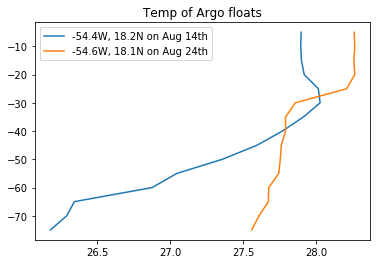

In [164]:
ind1=argo_4['lon'].tolist().index(-54.4)
ind2=argo_4['lon'].tolist().index(-54.6)
day1=argo_4['day'][ind1]
day2=argo_4['day'][ind2]
print(argo_4['date'][ind1])
print(argo_4['date'][ind2])

lon1=argo_4['lon'][ind1]
lon2=argo_4['lon'][ind2]
lat1=argo_4['lat'][ind1]
lat2=argo_4['lat'][ind2]
temp1=argo_4['temp'][ind1][0:15]
temp2=argo_4['temp'][ind2][0:15]

salt1=argo_4['salt'][ind1][0:15]
salt2=argo_4['salt'][ind2][0:15]
depth=argo_4['pres'][ind1][0:15]

t2=[t1*-1 for t1 in depth]
print(t2)
label1=str(lon1)+'W, '+str(lat1)+'N on Aug '+str(day1)+'th'
label2=str(lon2)+'W, '+str(lat2)+'N on Aug '+str(day2)+'th'
plt.plot(temp1, t2,linestyle='solid',label=label1)
plt.title('Temp of Argo floats')
plt.plot(temp2, t2,linestyle='solid',label=label2)
plt.legend()

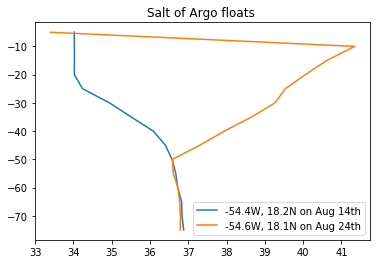

In [165]:
plt.plot(salt1, t2,linestyle='solid',label=label1)
plt.title('Salt of Argo floats ')
plt.plot(salt2, t2,linestyle='solid',label=label2)
plt.legend()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

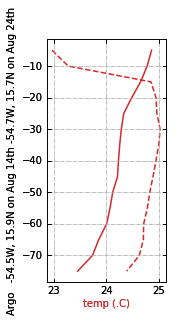

In [135]:
point_str="Argo "+label1+' '+label2
# plt.title("Random Walk Example", fontsize=16, fontweight='bold')
# plt.suptitle("Random Walk Suptitle", fontsize=10)
plot_profile_blt_twolines(temp1,salt1,temp2,salt2,t2,point_str)

###### 画选择剖线的点，在地图上的位置

Text(0.5,1,'Argo floats locations with OISST on Aug 14th, 2007')

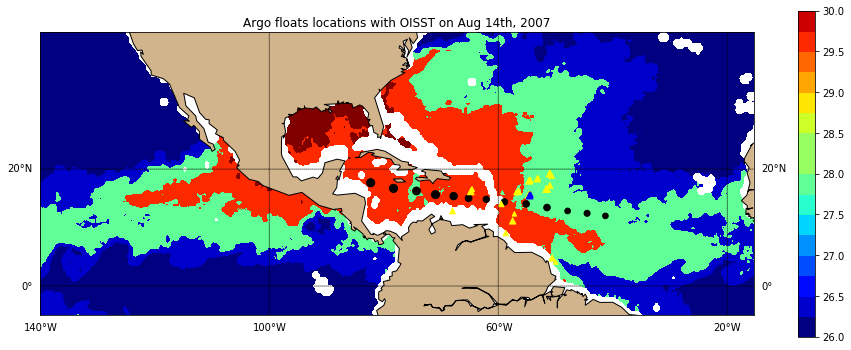

In [148]:
path1="/Users/yuxiao/Desktop/aoml3"
nc2=Dataset(path1+"/20070814120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc")
lon_curv2=nc2.variables['lon'][:]
lat_curv2=nc2.variables['lat'][:]
ind1=np.where(lon_curv2==-140.125)[0][0]
ind2=np.where(lon_curv2==-15.125)[0][0]  # actually didn't include this, only include -15.375
ind3=np.where(lat_curv2==-5.125)[0][0]
ind4=np.where(lat_curv2==40.625)[0][0]
lon_curv3=lon_curv2[ind1:ind2]

lat_curv3=lat_curv2[ind3:ind4]
temp_nc2=nc2.variables['analysed_sst']  #only use the first date
temp_nc3=temp_nc2[0,ind3:ind4,ind1:ind2]-273.15
np.shape(temp_nc3)

fig = plt.figure(num=None, figsize=(16, 6) )
m = Basemap(projection='merc',llcrnrlat=-5.125,urcrnrlat=40.5,llcrnrlon=-140.125,urcrnrlon=-15.375,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan')
# draw parallels and meridians.
m.drawparallels(np.arange(-20.,40.,20.),labels=[True,True,False,False],dashes=[1,1])
m.drawmeridians(np.arange(-140.,20.,40.),labels=[False,False,False,True],dashes=[1,1])

ny = temp_nc3.shape[0]
nx = temp_nc3.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
p = m.contourf(x, y, temp_nc3, 10, vmin=26, vmax=30, cmap=plt.cm.get_cmap('jet', 16))  #cm.nipy_spectral,bwr, RdBu_r , vmin=-2, vmax=2

cbar = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('jet', 16))
cbar.set_array(temp_nc2)
cbar.set_clim(26,30.25)
plt.colorbar(cbar, boundaries=np.arange(26,30.25,0.25))  

# hurricane tracks
# start with 08-15 00:00, every 12 hours
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05]
s = vmax*5
x,y=m(xh,yh)
plt.scatter(x, y, s, c="black", marker='o',label="Dean track")

# put argo locations on it
# the chosen one is blue color

xh4=argo_4['lon']
yh4=argo_4['lat']
days4=argo_4['day']
s4 = days4*2
x4,y4=m(xh4,yh4)
plt.scatter(x4, y4, s4, c="yellow", marker='^',label="Argo")

xh2=lon1
yh2=lat1
days2=day1
s2 = day1*2
x2,y2=m(xh2,yh2)
plt.scatter(x2, y2, s2, c="blue", marker='^',label="Argo")
# plt.scatter(x2, y2, s2, c="yellow", marker='^',label="Argo")

xh3=lon2
yh3=lat2
days3=day2
s3 = day2*2
x3,y3=m(xh3,yh3)
# plt.scatter(x3, y3, s3, c="yellow", marker='^',label="Argo")
plt.scatter(x3, y3, s3, c="blue", marker='^',label="Argo")

plt.title('Argo floats locations with OISST on Aug 14th, 2007')

In [59]:
# calculate the mld by temperature
def mld_temp(temp, z):
    # default: 10m layer is in the ind=1 layer 
    # ind_10m=np.where((z<-9)&(z>-11))[0][0]
    ind_10m=1
    for index, dep in enumerate(z[ind_10m::]):
        if temp[index+ind_10m]<temp[ind_10m]-0.2:
            return dep
            break

In [70]:
# http://www.ifremer.fr/cerweb/deboyer/mld/Surface_Mixed_Layer_Depth.php 
# calculate density mld
#  计算位势密度

def mld_density(temp,salt,z):
    # temp, salt is 1d, only has the depth
    # default: 10m layer is in the ind=1 layer 
    density_profiles = csr.dens(salt, temp, 0)  #the origianl density
    
    # calculate the critical density 
    #ind_10m=np.where((z<-9)&(z>-11))[0][0]
    ind_10m=1
    delta_density=csr.dens(salt[ind_10m], temp[ind_10m]-0.2, 0)-csr.dens(salt[ind_10m], temp[ind_10m], 0)
#     print(delta_density)
    density_zero=density_profiles[ind_10m]+delta_density
    
    rou0=min(density_profiles, key=lambda x:abs(x-density_zero))
    
    print(rou0)
    ind=np.argwhere(density_profiles==rou0)[0][0]
    print(ind)
    if ind.size==0:
        return None
    else:
        return z[ind]

In [89]:
def plot_profile_blt_twolines(temp1,salt1,temp2,salt2,depth,point_str):
    # use temp and salt to calulate density, then use depth to calculate BLT, ILD, MLD
    #  plot two files with the ILD, MLD lines
    #  point_str,date are string
    #  plot four lines together (before hurricane and after hurricane)  
    from mpl_toolkits.axes_grid1 import host_subplot
    import mpl_toolkits.axisartist as AA
    
    t=depth
    dens1 = csr.dens(salt1, temp1, t)   # use this function to calulate density
    dens2 = csr.dens(salt2, temp2, t)     

#     fig, ax1 = plt.subplots()
    fig = plt.figure(1, (6, 9))
    plt.subplots_adjust(top=0.5,right=0.4)
    ax1 = host_subplot(111, axes_class=AA.Axes)
    
    # print('depth of point ',point_str)
    color = 'tab:red'
    ax1.set_xlabel('temp (.C)', color=color)
    ax1.set_ylabel(point_str, color='black')
    ax1.plot(temp1, t, color=color,label="Temp before Hurricane")
    ax1.plot(temp2, t, color=color, linestyle='dashed',label="Temp after Hurricane")       
    ax1.tick_params(axis='x', labelcolor=color)
    ax1.grid(True, linestyle='-.',lw=0.6)
    
    ild1=int(mld_temp(temp1, t))
    ild2=int(mld_temp(temp2, t))
    tempmin=min(min(temp1),min(temp2))
    tempmax=max(max(temp1),max(temp2))
    print(tempmax)
    ax1.set_xlim(tempmin, tempmax)
    ax1.plot([tempmin, tempmax], [ild1, ild1], linestyle ='-',lw=3, color=color)
    ax1.plot([tempmin, tempmax], [ild2, ild2], linestyle ='--',lw=3, color=color)
    ax1.text(tempmax, ild1, ' MLD '+str(ild1), fontsize=12, color=color)
    ax1.text(tempmax, ild2, ' MLD '+str(ild2), fontsize=12, color=color)
#     ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.4))
    
    
    ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
     
    ax2.plot(dens1,t, color=color,label="Density before Hurricane")
    ax2.plot(dens2,t, color=color, linestyle='dashed',label="Density after Hurricane")
    
    
          #设置坐标轴摆放位置和距离
    offset = -10
    new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
    ax2.axis["top"] = new_fixed_axis(loc="top",axes=ax2,offset=( 0,offset))
    ax2.axis["top"].toggle(all=True)
    ax2.set_xlabel('Density (kg/m3)', color=color)  # we already handled the x-label with ax1
    ax2.tick_params(axis='top', labelcolor=color)
    print(mld_density(temp1,salt1,t))
    mld1=int(mld_density(temp1,salt1,t))
    mld2=int(mld_density(temp2,salt2,t))
    densmin=min(min(dens1),min(dens2))
    densmax=max(max(dens1),max(dens2))
    ax2.set_xlim(densmin, densmax)
    ax2.plot([densmin, densmax], [mld1, mld1], linestyle ='-',lw=3, color=color)
    ax2.plot([densmin, densmax], [mld2, mld2], linestyle ='--',lw=3, color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax2.text(densmax, mld1, ' ILD '+str(mld1), fontsize=12, color=color)
    ax2.text(densmax, mld2, ' ILD '+str(mld2), fontsize=12, color=color)
    
    
    
    ax3 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'orange'
    ax3.plot(salt1,t, color=color,label="Salinity before Hurricane")
    
    saltmin= min(min(salt1),min(salt2))
    saltmax= max(max(salt1),max(salt2))
    ax3.set_xlim(saltmin, saltmax)
    
    #设置坐标轴摆放位置和距离
    offset = 40
    new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
    ax3.axis["top"] = new_fixed_axis(loc="bottom",axes=ax3,offset=( 0,offset))
    ax3.axis["top"].toggle(all=True)
    ax3.set_xlabel('Salinity (psu)', color=color)
    ax3.tick_params(axis='top', labelcolor=color)
    
    plt.legend(loc='lower left', bbox_to_anchor=(0.05, 0.1))
    return plt.show()
